<a href="https://colab.research.google.com/github/allaboutsimple/aibootcamp/blob/main/ai04_sc12x_%EC%B5%9C%EC%9C%A4%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# SC12x

## Statistical Analysis

## 개요

여러분은 코스 수료를 마치고 CodeStates에 DS CA (Coaching  Assistant)로 합류했습니다.

여러분에게 주어진 메인 태스크는 세션 및 수강생 핸들링이지만. 

시간을 짜내어 사이드 프로젝트를 하고 싶어졌습니다.

AIB 팀원들과의 커피타임을 통해 수강생 데이터를 하나 받을 수 있었습니다.

> 기수별 학생들 성취도 데이터인데, 어떤 의미가 있는지 확인해주세요.

### Data Description

- F1 : `N`, `D`
- F2 : `Y`, `N`
- F3 : `A`, `B`, `C`, `D` (기수)
- F4 : Continuous
- F5 : Continuous
- F6 : `A` ~ `H`
- F7 : Continuous
- F8 : `X`, `Y`, `Z`
- F9 : `Y`, `N`

## 1. 다음 링크를 참조하여 데이터를 불러오세요. 

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv>

이후 간단한 전처리를 하세요.


In [167]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv")

In [168]:
print(df.head()) # 데이터 head 열어서 파악
print(df.tail()) # 데이터 tail 열어서 파악
print(df.info()) # 데이터의 type등 확인
print(df.shape) # shape확인
print(df.isnull().sum()) # 결측 값 수
print(df.sum()) # 합

   Unnamed: 0 F1 F2 F3        F4        F5 F6   F7 F8 F9
0           1  N  N  A  2.239542  0.773708  H  3.0  Y  Y
1           2  D  N  A  1.608900  0.133612  H  3.0  X  Y
2           3  N  N  A  2.544409  0.721873  H  8.0  Y  Y
3           4  N  Y  A  0.782857  0.259751  F  9.0  Y  N
4           5  N  N  A  1.532721  0.283534  E  4.0  Z  Y
     Unnamed: 0 F1 F2 F3        F4        F5 F6   F7 F8 F9
195         196  N  N  D  2.765327  0.753814  G  5.0  X  Y
196         197  N  Y  D  3.098499  0.637145  G  2.0  Y  Y
197         198  N  N  D  1.613861  0.882830  F  2.0  Z  Y
198         199  N  N  d  3.003789  0.892767  G  4.0  Z  Y
199         200  N  N  D  2.468083  0.121094  G  5.0  X  N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   F1          200 non-null    object 
 2   F2          191 non-null    ob

In [169]:
# 결측값 확인하여 0으로 바꾸기
df.fillna(0, inplace=True) 
print(df.isnull().sum())
df.set_index('Unnamed: 0', inplace=True) 


Unnamed: 0    0
F1            0
F2            0
F3            0
F4            0
F5            0
F6            0
F7            0
F8            0
F9            0
dtype: int64


## 2. **F3**에 따라서 다른 Feature들이 어떤 경향을 나타내는지 해석해보세요.

- categorical feature의 경우 crosstab을 사용하여 [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)과 chi-square를 시도해 볼 수 있습니다.

- continuous feature의 경우 여러 시각화와 t-test를 할 수 있을 겁니다.

- 이를 바탕으로 **가장 유의미한** 그리고 **가장 무의미한** feature를 찾아보세요.

여기서 여러분들의 목표는 

`F3`에 따라서 다른 feature들이 영향이 있는지 없는지를 알아보는 

**가설검정** 입니다.

따라서 데이터 탐색 및 시각화 작업에 너무 많은 시간을 쏟지 마세요. 이것은 사이드 프로젝트 입니다.

In [170]:
#소문자와 대문자 규격맞춤
print(df['F3'].unique())
df=df.replace({'a':'A'}).replace({'b':'B'}).replace({'c':'C'}).replace({'d':'D'})
print(df['F3'].unique())
df

['A' 'a' 'B' 'b' 'C' 'c' 'D' 'd']
['A' 'B' 'C' 'D']


,F1,F2,F3,F4,F5,F6,F7,F8,F9
Unnamed: 0,,,,,,,,,
1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
2,D,N,A,1.608900,0.133612,H,3.0,X,Y
3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
5,N,N,A,1.532721,0.283534,E,4.0,Z,Y
...,...,...,...,...,...,...,...,...,...
196,N,N,D,2.765327,0.753814,G,5.0,X,Y
197,N,Y,D,3.098499,0.637145,G,2.0,Y,Y
198,N,N,D,1.613861,0.882830,F,2.0,Z,Y


In [171]:
#continuous feature
pivot=pd.pivot_table(df, index='F3')
pivot

,F4,F5,F7
F3,,,
A,1.618046,0.446866,4.94
B,2.563696,0.415067,4.70
C,3.342931,0.430444,4.86
D,2.525947,0.408395,4.94


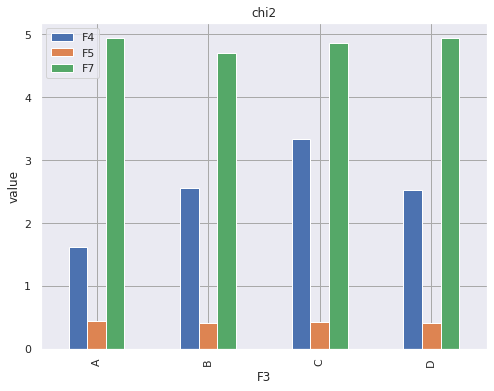

In [206]:
#데이터 시각화 by plt
import matplotlib.pyplot as plt
%matplotlib inline

ax = pivot.plot(kind='bar', title='chi2', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()

In [212]:
import scipy.stats
scipy.stats.chisquare(df["F1"].value_counts())

Power_divergenceResult(statistic=81.92, pvalue=1.4170803476684087e-19)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


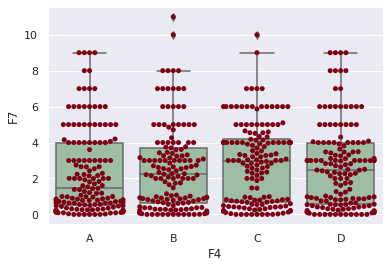

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melt = pd.melt(df.reset_index(), id_vars=['F3'], value_vars=['F4', 'F5', 'F7'])
df_melt.columns = ['F4', 'F5', 'F7']

ax = sns.boxplot(x='F4', y='F7', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="F4", y="F7", data=df_melt, color='#7d0013')
plt.show()

In [200]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(pivot['F4'], pivot['F5'], pivot['F7'])
print(fvalue, pvalue)

115.69152592874401 3.802103997671801e-07


## 3. 분석한 내용들을 설명하는 리포트를 작성해보세요. 

분석의 끝은 결국 설명입니다.

통계 분석에 대한 이해도가 적은 다른 크루들이 이해 할 수 있도록 

분석한 내용들을 설명하는 리포트를 작성해보세요. 

필요한 경우 코드 / 텍스트 내용을 더 추가해도 좋습니다.

In [241]:
print('''continuous feature의 경우 데이터 시각화를 통해 
F4의 결과값이 팀C>팀B>팀A>팀D순으로 높았으며 
F7의 경우 팀B가 눈에 띄는 아웃라이어를 보였습니다.

현재까지 분석한 값들 중 가장 유의미한 값은 F4, 
가장 무의미한 값은 별다른 변동성이 없없던 F5로 확인됩니다.

categorical feature는 아직 답을 얻지 못했습니다.''')

continuous feature의 경우 데이터 시각화를 통해 
F4의 결과값이 팀C>팀B>팀A>팀D순으로 높았으며 
F7의 경우 팀B가 눈에 띄는 아웃라이어를 보였습니다.

현재까지 분석한 값들 중 가장 유의미한 값은 F4, 
가장 무의미한 값은 별다른 변동성이 없없던 F5로 확인됩니다.

categorical feature는 아직 답을 얻지 못했습니다.


## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하고, 시간이 남았다면 아래 내용을 충족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들 중 하나의 요구사항만 충족하면 되며, 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- Numerical 데이터에 대해서 normalize를 한 다음, 위에서 진행 했었던 분석을 다시 시행해보세요. (F4, F5, F7 vs F3)

- Categorical 데이터를 one-hot encoding을 통해서 numerical 로 변환 후, 위에서 진행 했었던 분석을 다시 시행해보세요. (F1, F2, F6, F8, F9 vs F3)

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다